# Análise Exploratória e Preditiva de Dados - Desafio

## 1. Introdução

Este notebook apresenta a análise exploratória do dataset `dados_desafio.xlsx`, com o objetivo de compreender a estrutura dos dados, identificar padrões, possíveis problemas e preparar o caminho para etapas futuras de modelagem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format
warnings.filterwarnings('ignore')

## 2. Carregamento dos Dados

Os dados foram carregados a partir de um arquivo Excel utilizando a biblioteca `pandas`

In [2]:
df = pd.read_excel("../data/dados_desafio.xlsx")

## 3. Análise Inicial

- Análise das primeiras linhas do dataframe

In [3]:
df.head()

,id_pedido,tipo_pagamento,prestacoes,valor_pagamento,id_cliente,status_pedido,data_hora_pedido,pedido_aprovado,pedido_com_entregador,pedido_entregue,tempo_entregue_estimado,id_avaliacao,score_avaliacao,data_avaliacao,data_resposta_avaliacao,id_item,id_vendedor,data_limite_entrega,preco,valor_frete,categoria_produto,peso_produto,comprimento_produto,altura_produto,largura_produto,cep_vendedor,cidade_vendedor,estado_vendedor,id_unica_cliente,cep_cliente,cidade_cliente,estado_cliente
0,05d5a67b06f86425711075939a164657,credit_card,1,18.38,716c95338343be76a421f05145f6d9b7,delivered,2017-10-24 09:17:09.000,2017-10-24 09:28:15.000,2017-10-25 22:45:59.000,2017-10-26 14:13:59.000,2017-11-06,5064d6d99510e06a10487f7773f79060,4,2017-10-27,2017-10-27 17:13:20.000,2a592642399b33baf3a5729a6335b21c,b83cedfb587e7911540e3f576d6917ce,2017-10-30 09:28:15.000,9.99,7.78,perfumaria,100.00,16.00,7.00,12.00,4870,sao paulo,SP,b4acaca510f847f9927914b51f9b0874,9861,sao bernardo do campo,SP
1,b1f9820e61b6a6a7643c961eaf4f217d,credit_card,1,28.23,6e550daa4d9d07414a598ee4682289a0,delivered,2018-04-09 18:06:35.971,2018-04-09 18:31:35.962,2018-04-10 19:24:56.995,2018-04-16 18:05:41.971,2018-05-07,f86e7499e15b26ac97f22354ef917bd1,5,2018-04-17,2018-04-18 12:46:56.986,499a1638595575721fec87dbaa05f339,25cf099de44674fde97473224f9d59ab,2018-04-13 18:31:31.987,10.00,18.23,automotivo,350.00,20.00,15.00,15.00,6716,cotia,SP,9abf4d8d20ca191ce59eb6227cf53d6d,38270,campina verde,MG
2,b27f6a3ed9bfe29879c912b10bcf081b,credit_card,9,92.57,dd774d127953e12f6953a9d36e6a3cc4,delivered,2018-01-02 20:32:35.981,2018-01-02 20:50:16.022,2018-01-08 12:32:48.019,2018-01-16 20:52:39.014,2018-01-24,a5fc2433140223de219d3fcfc548f3ff,4,2018-01-17,2018-01-22 10:00:16.963,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2018-01-08 20:50:16.022,79.00,13.57,papelaria,"7,000.00",60.00,20.00,30.00,13232,campo limpo paulista,SP,dc446a1ea0c8cc3eb1cd31896f6cf00f,12919,braganca paulista,SP
3,a182c021b0561e70031de925b3991fb3,credit_card,4,176.99,1d93c38087f43927ad29cdbd73a1a01b,delivered,2018-04-02 20:25:56.035,2018-04-02 20:35:17.030,2018-04-04 18:13:12.029,2018-04-11 11:14:30.970,2018-04-25,bdd2176b8d0ed0d5414dc07547720dd2,5,2018-04-12,2018-04-16 12:09:10.022,6f3b5b605d91b7439c5e3f5a8dffeea7,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-06 20:35:17.030,158.00,18.99,relogios_presentes,335.00,17.00,11.00,16.00,14840,guariba,SP,14691264ea396cd3bd71ebbe36bc6771,29278,arace,ES
4,8e76f4ac6aee1d6013e40279de68a7cf,credit_card,10,110.56,e085989aa21e36b90469d6940aefe23c,delivered,2017-08-05 17:52:44.026,2017-08-05 18:10:09.034,2017-08-07 17:39:02.966,2017-08-15 19:59:47.962,2017-08-31,44b50a1399e3b7c7b553984d2151fbc4,4,2017-08-16,2017-08-17 00:34:48.979,8cbd33515c33f6bc2042660baff504b5,cca3071e3e9bb7d12640c9fbe2301306,2017-08-10 18:10:09.034,40.18,15.10,moveis_decoracao,650.00,50.00,7.00,33.00,14940,ibitinga,SP,06c211500493e0aa2c584346c15a1d81,95770,feliz,RS


- Análise das últimas linhas do dataframe

In [4]:
df.tail()

,id_pedido,tipo_pagamento,prestacoes,valor_pagamento,id_cliente,status_pedido,data_hora_pedido,pedido_aprovado,pedido_com_entregador,pedido_entregue,tempo_entregue_estimado,id_avaliacao,score_avaliacao,data_avaliacao,data_resposta_avaliacao,id_item,id_vendedor,data_limite_entrega,preco,valor_frete,categoria_produto,peso_produto,comprimento_produto,altura_produto,largura_produto,cep_vendedor,cidade_vendedor,estado_vendedor,id_unica_cliente,cep_cliente,cidade_cliente,estado_cliente
112487,b0e9288a209f5ec50391c140dba4c91f,credit_card,1,36.13,e1ccb7645c1d9af9b91b6d521e0ba64a,delivered,2018-08-25 07:32:24.979,2018-08-25 07:45:07.978,2018-08-27 20:03:00.029,2018-08-30 21:16:34.032,2018-09-14,02d00568beb770ce3939f4fca60556a1,5,2018-08-31,2018-09-05 22:33:44.035,94a6c010ef78e62cab34c6caf0a69b5f,080102cd0a76b09e0dcf55fcacc60e05,2018-08-28 07:45:07.978,17.90,18.23,consoles_games,100.00,20.00,3.00,15.00,31140,belo horizonte,MG,d2ac08ce3b32b9dc32acb436d25a1ad8,13690,descalvado,SP
112488,5f5d82c66499b9a72f7e8071477aee00,credit_card,1,21.77,2e3a0d5dfa1d77144e41d8219fd8934f,delivered,2017-10-31 19:33:20.016,2017-10-31 19:47:42.979,2017-11-01 18:33:02.016,2017-11-03 16:29:53.002,2017-11-10,21069ffcc48500dad15f6b8fc51aff19,4,2017-11-04,2017-11-06 19:41:29.040,1c9b5793de6c3d9117b6218552c87a8f,3c7c4a49ec3c6550809089c6a2ca9370,2017-11-07 19:47:09.024,13.99,7.78,perfumaria,50.00,16.00,5.00,11.00,3804,sao paulo,SP,6db83e5c493613ba8f9d4ddeb3af9bcf,9910,diadema,SP
112489,b857ab4fe30b0d1e9eaa0922b8a8d364,credit_card,2,227.66,98d3c3f34ca9bbb7c3a7e69d626b90a0,delivered,2018-05-18 19:56:54.038,2018-05-18 20:17:29.040,2018-05-29 14:10:00.019,2018-06-12 20:11:51.994,2018-07-03,ae9d19f932d50181e0b07daaa5c4963a,5,2018-06-13,2018-06-16 00:16:45.005,b5841e1059b5b0513b7f03b6646e7229,cee48807215b30a12ca2ca10ffb5f250,2018-06-04 20:17:29.040,199.90,27.76,automotivo,"2,550.00",35.00,20.00,20.00,11431,guaruja,SP,97b27e8f7862217bae2f5bbc66e15b77,22720,rio de janeiro,RJ
112490,df8f138cbe59c7bb4454c61d1223ca18,credit_card,8,134.13,d77f3797ee0abe8fc7d85e9610400958,delivered,2018-06-01 15:09:59.962,2018-06-01 15:31:49.958,2018-07-04 06:38:00.010,2018-07-05 19:51:34.963,2018-07-19,0216b7c032381d8491f94dc6be0fc0af,4,2018-07-06,2018-07-07 22:46:13.987,e0d64dcfaa3b6db5c54ca298ae101d05,2eb70248d66e0e3ef83659f71b244378,2018-06-27 15:31:38.035,124.90,9.23,relogios_presentes,"4,338.00",17.00,12.00,14.00,13101,campinas,SP,9751244bd65fd1f1166ab7f3e10a31ab,13284,vinhedo,SP
112491,8811b551e13f7f1be237272ebb8c30cb,credit_card,1,48.13,caa4f57153e47838c4335d18d96bdc38,delivered,2018-03-08 00:01:28.042,2018-03-08 00:16:10.013,2018-03-08 16:38:49.027,2018-04-02 20:39:21.974,2018-03-27,670a07360a960498c53f343ece011d64,1,2018-03-29,2018-03-29 12:40:02.006,e0cf79767c5b016251fe139915c59a26,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-14 00:16:10.013,29.90,18.23,beleza_saude,250.00,16.00,5.00,15.00,13405,piracicaba,SP,a883e6b329b7f56b2b99309d6eb181cf,34018,nova lima,MG


- Quantidade de linhas e colunas

In [5]:
df.shape

(112492, 32)

- Inspeção dos tipos de dado de cada coluna

In [6]:
df.dtypes

id_pedido                          object
tipo_pagamento                     object
prestacoes                          int64
valor_pagamento                   float64
id_cliente                         object
status_pedido                      object
data_hora_pedido           datetime64[ns]
pedido_aprovado            datetime64[ns]
pedido_com_entregador      datetime64[ns]
pedido_entregue            datetime64[ns]
tempo_entregue_estimado    datetime64[ns]
id_avaliacao                       object
score_avaliacao                     int64
data_avaliacao             datetime64[ns]
data_resposta_avaliacao    datetime64[ns]
id_item                            object
id_vendedor                        object
data_limite_entrega        datetime64[ns]
preco                             float64
valor_frete                       float64
categoria_produto                  object
peso_produto                      float64
comprimento_produto               float64
altura_produto                    

- Verifica informações sobre o arquivo

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112492 entries, 0 to 112491
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id_pedido                112492 non-null  object        
 1   tipo_pagamento           112492 non-null  object        
 2   prestacoes               112492 non-null  int64         
 3   valor_pagamento          112492 non-null  float64       
 4   id_cliente               112492 non-null  object        
 5   status_pedido            112492 non-null  object        
 6   data_hora_pedido         112492 non-null  datetime64[ns]
 7   pedido_aprovado          112477 non-null  datetime64[ns]
 8   pedido_com_entregador    111312 non-null  datetime64[ns]
 9   pedido_entregue          110129 non-null  datetime64[ns]
 10  tempo_entregue_estimado  112492 non-null  datetime64[ns]
 11  id_avaliacao             112492 non-null  object        
 12  score_avaliacao 

- Estatísticas descritivas para variáveis numéricas

In [7]:
df.describe()

,prestacoes,valor_pagamento,data_hora_pedido,pedido_aprovado,pedido_com_entregador,pedido_entregue,tempo_entregue_estimado,score_avaliacao,data_avaliacao,data_resposta_avaliacao,data_limite_entrega,preco,valor_frete,peso_produto,comprimento_produto,altura_produto,largura_produto,cep_vendedor,cep_cliente
count,"112,492.00","112,492.00",112492,112477,111312,110129,112492,"112,492.00",107860,107860,112492,"112,492.00","112,492.00","112,474.00","112,474.00","112,474.00","112,474.00","112,492.00","112,492.00"
mean,2.92,172.13,2017-12-31 11:18:05.374500608,2017-12-31 22:49:54.144173568,2018-01-04 12:59:30.339850496,2018-01-14 00:41:26.473019392,2018-01-24 07:09:02.886605312,4.03,2018-01-13 01:57:23.931044352,2018-01-16 05:25:56.219309056,2018-01-07 02:18:03.018948352,121.25,20.06,"2,115.40",30.24,16.65,23.07,"24,446.10","35,020.36"
min,0.00,0.00,2016-09-04 21:15:19.037000,2016-10-04 09:43:31.958000,2016-10-08 10:34:00.970000,2016-10-11 13:46:31.958000,2016-10-20 00:00:00,1.00,2016-10-15 00:00:00,2016-10-16 03:20:17.030000,2016-09-19 00:15:33.984000,0.85,0.00,0.00,7.00,2.00,6.00,"1,001.00","1,003.00"
25%,1.00,60.70,2017-09-12 18:43:46.732500224,2017-09-13 06:10:09.984000,2017-09-15 21:14:22.488249856,2017-09-25 21:22:30,2017-10-04 00:00:00,4.00,2017-09-23 00:00:00,2017-09-27 16:17:17.476750080,2017-09-19 20:10:26.975750144,39.90,13.08,300.00,18.00,8.00,15.00,"6,429.00","11,310.00"
50%,2.00,108.10,2018-01-19 12:46:34.003000064,2018-01-19 20:17:01.996999936,2018-01-24 12:58:35.011500032,2018-02-02 15:51:56.966000128,2018-02-15 00:00:00,5.00,2018-02-02 00:00:00,2018-02-05 10:41:25.022500096,2018-01-26 02:10:24.513500160,74.99,16.31,700.00,25.00,13.00,20.00,"13,568.00","24,240.00"
75%,4.00,188.89,2018-05-04 17:31:44.983000064,2018-05-05 03:10:28.992000,2018-05-08 13:09:59.990000128,2018-05-15 20:38:53.980999936,2018-05-28 00:00:00,5.00,2018-05-16 00:00:00,2018-05-20 14:07:50.246499840,2018-05-10 14:15:23.003750144,134.90,21.19,"1,800.00",38.00,20.00,30.00,"28,470.00","58,410.00"
max,24.00,"13,664.08",2018-08-29 15:00:36.979000,2018-08-29 15:10:25.968000,2018-09-11 19:48:27.994000,2018-10-17 13:22:46.013000,2018-10-23 00:00:00,5.00,2018-08-31 00:00:00,2018-10-29 12:27:34.992000,2020-04-09 22:35:08.016000,"6,735.00",409.68,"40,425.00",105.00,105.00,118.00,"99,730.00","99,990.00"
std,2.76,267.55,NaN,NaN,NaN,NaN,NaN,1.39,NaN,NaN,NaN,184.61,15.92,"3,787.44",16.18,13.49,11.76,"27,591.91","29,820.27"


- Verificação de colunas com dados faltantes

In [8]:
df.isnull().sum()

id_pedido                     0
tipo_pagamento                0
prestacoes                    0
valor_pagamento               0
id_cliente                    0
status_pedido                 0
data_hora_pedido              0
pedido_aprovado              15
pedido_com_entregador      1180
pedido_entregue            2363
tempo_entregue_estimado       0
id_avaliacao                  0
score_avaliacao               0
data_avaliacao             4632
data_resposta_avaliacao    4632
id_item                       0
id_vendedor                   0
data_limite_entrega           0
preco                         0
valor_frete                   0
categoria_produto          1620
peso_produto                 18
comprimento_produto          18
altura_produto               18
largura_produto              18
cep_vendedor                  0
cidade_vendedor               0
estado_vendedor               0
id_unica_cliente              0
cep_cliente                   0
cidade_cliente                0
estado_c

- Contagem de valores únicos por coluna

In [9]:
unique_counts = df.nunique().sort_values()
unique_counts

tipo_pagamento                 4
score_avaliacao                5
status_pedido                  7
estado_vendedor               23
prestacoes                    24
estado_cliente                27
categoria_produto             73
largura_produto               95
comprimento_produto           99
altura_produto               102
tempo_entregue_estimado      446
cidade_vendedor              603
data_avaliacao               631
peso_produto                2183
cep_vendedor                2232
id_vendedor                 3064
cidade_cliente              4063
preco                       5846
valor_frete                 6908
cep_cliente                14790
valor_pagamento            28331
id_item                    31951
pedido_com_entregador      77831
pedido_aprovado            86554
data_limite_entrega        89465
data_resposta_avaliacao    90891
pedido_entregue            91637
data_hora_pedido           94135
id_pedido                  94385
id_cliente                 94385
id_unica_c

## 4. Identificação de Variáveis Categóricas
- Inicialmente, foram consideradas como candidatas a categóricas as variáveis com até 20 valores únicos

In [10]:
categorical_candidates = unique_counts[unique_counts <= 20].index.tolist()

In [11]:
categorical_candidates

['tipo_pagamento', 'score_avaliacao', 'status_pedido']

- Complementarmente, variáveis do tipo `object` ou que representam categorias relevantes para o negócio foram incluídas manualmente

In [82]:
categorical_manual = [
    'categoria_produto',
    'cidade_cliente',
    'estado_cliente',
]
categorical_variables = list(set(categorical_candidates + categorical_manual))

- O critério misto (automático + manual) foi adotado para garantir que variáveis importantes não fossem descartadas apenas pelo número de categorias

In [77]:
categorical_variables

['cidade_cliente',
 'estado_cliente',
 'categoria_produto',
 'status_pedido',
 'score_avaliacao',
 'tipo_pagamento']

## Conversão de CEPs

- As colunas `cep_vendedor` e `cep_cliente` foram convertidas para string, pois CEPs são identificadores e não devem ser tratados como variáveis numéricas


In [15]:
df['cep_vendedor'] = df['cep_vendedor'].astype(str)
df['cep_cliente'] = df['cep_cliente'].astype(str)

- Seleção de variáveis numéricas e remoção de `score_avaliacao` delas

In [78]:
numerical_variables = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_variables.remove('score_avaliacao')

## 5. Visualização das Variáveis

In [79]:
numerical_variables

['prestacoes',
 'valor_pagamento',
 'preco',
 'valor_frete',
 'peso_produto',
 'comprimento_produto',
 'altura_produto',
 'largura_produto']

- Estatísticas de variáveis numéricas

In [80]:
df[numerical_variables].describe()

,prestacoes,valor_pagamento,preco,valor_frete,peso_produto,comprimento_produto,altura_produto,largura_produto
count,"112,492.00","112,492.00","112,492.00","112,492.00","112,474.00","112,474.00","112,474.00","112,474.00"
mean,2.92,172.13,121.25,20.06,"2,115.40",30.24,16.65,23.07
std,2.76,267.55,184.61,15.92,"3,787.44",16.18,13.49,11.76
min,0.00,0.00,0.85,0.00,0.00,7.00,2.00,6.00
25%,1.00,60.70,39.90,13.08,300.00,18.00,8.00,15.00
50%,2.00,108.10,74.99,16.31,700.00,25.00,13.00,20.00
75%,4.00,188.89,134.90,21.19,"1,800.00",38.00,20.00,30.00
max,24.00,"13,664.08","6,735.00",409.68,"40,425.00",105.00,105.00,118.00


- Quantidade de observações por prestações

In [38]:
df.groupby(['prestacoes']).size()

prestacoes
0         3
1     56224
2     13209
3     11297
4      7648
5      5707
6      4389
7      1733
8      4811
9       679
10     6390
11       22
12      157
13       17
14       14
15       81
16        7
17        7
18       38
20       19
21        4
22        1
23        1
24       34
dtype: int64

- O gráfico de barras foi escolhido para melhor visualização da frequência de cada valor

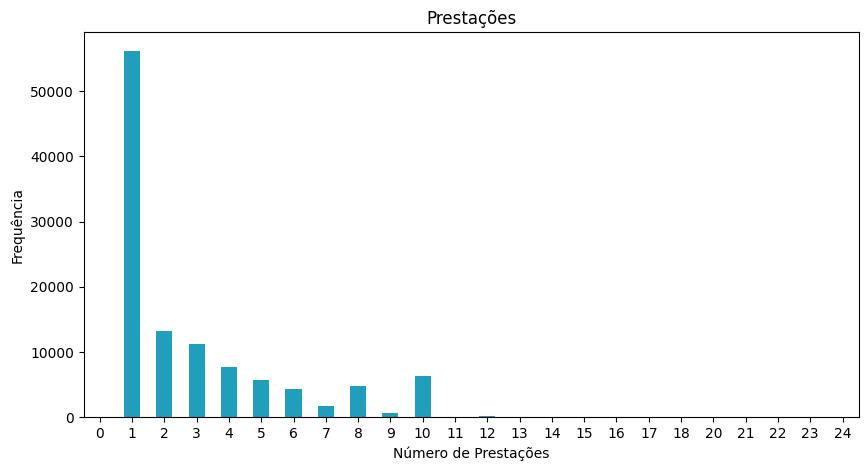

In [72]:
plt.figure(figsize=(10, 5))
df['prestacoes'].value_counts().sort_index().plot(kind='bar', color='#219ebc')
plt.title('Prestações')
plt.xlabel('Número de Prestações')
plt.ylabel('Frequência')
plt.xticks(rotation=0);

- Quantidade de observações por valor de pagamento

In [46]:
df['valor_pagamento'].size

112492

- O boxplot foi escolhido para a visualização já que temos muitos valores únicos para essa variável numérica, e assim já é possível identificar assimetrias e possíveis outliers

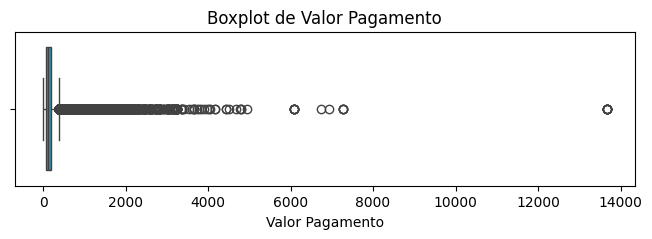

In [74]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['valor_pagamento'], color='#219ebc')
plt.title('Boxplot de Valor Pagamento')
plt.xlabel('Valor Pagamento');

- Quantidade de observações por preço

In [47]:
df['preco'].size

112492

- Visualização através de boxplot

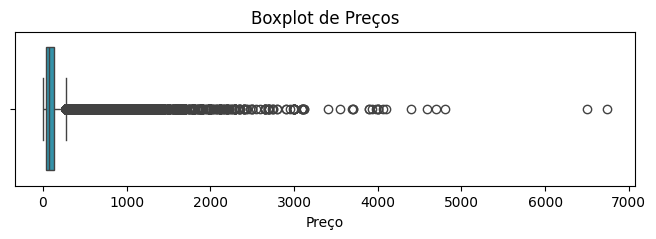

In [55]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['preco'], color='#219ebc')
plt.title('Boxplot de Preços')
plt.xlabel('Preço');

- Quantidade de observações por valor de frete

In [49]:
df['valor_frete'].size

112492

- Visualização através de boxplot

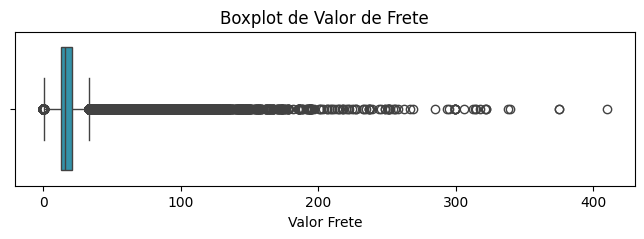

In [56]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['valor_frete'], color='#219ebc')
plt.title('Boxplot de Valor de Frete')
plt.xlabel('Valor Frete');

- Quantidade de observações por peso de produto

In [53]:
df['peso_produto'].size

112492

- Visualização em boxplot

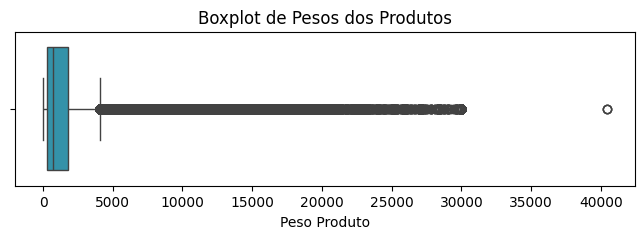

In [59]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['peso_produto'], color='#219ebc')
plt.title('Boxplot de Pesos dos Produtos')
plt.xlabel('Peso Produto');

- Quantidade de observações por comprimento de produto

In [60]:
df['comprimento_produto'].size

112492

- Visualização em histograma

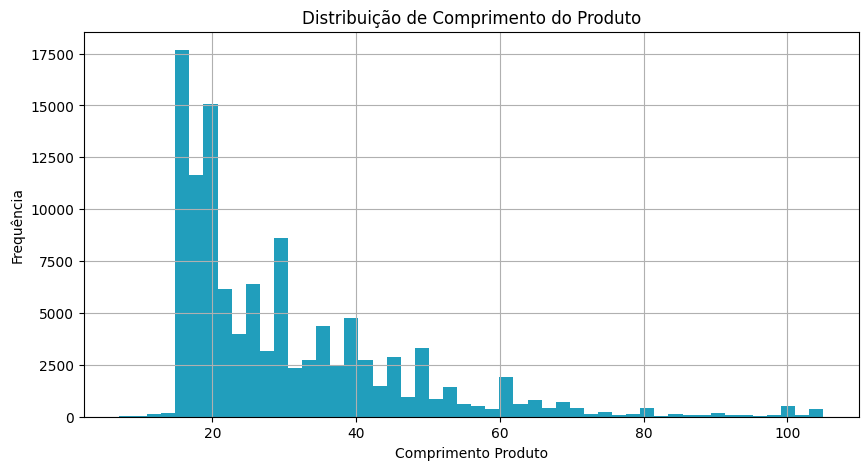

In [75]:
plt.figure(figsize=(10, 5))
df['comprimento_produto'].hist(bins=50, color='#219ebc')
plt.title('Distribuição de Comprimento do Produto')
plt.xlabel('Comprimento Produto')
plt.ylabel('Frequência');

- Observações por altura de produto

In [63]:
df['altura_produto'].size

112492

- Visualização em histograma

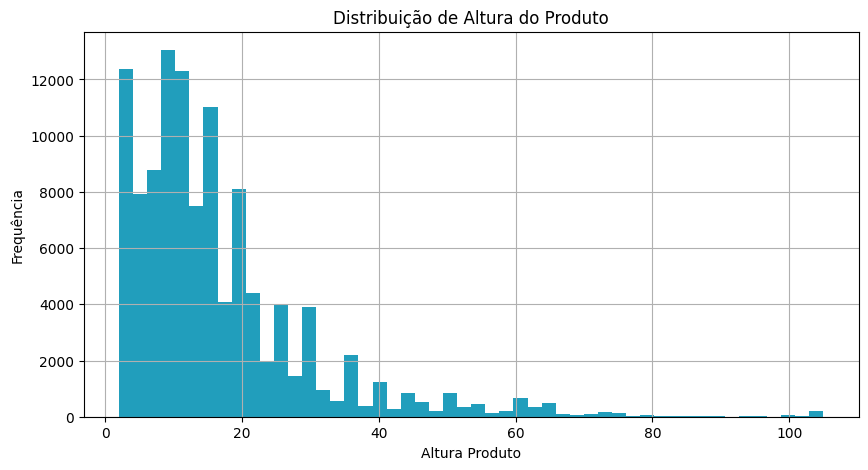

In [66]:
plt.figure(figsize=(10, 5))
df['altura_produto'].hist(bins=50, color='#219ebc')
plt.title('Distribuição de Altura do Produto')
plt.xlabel('Altura Produto')
plt.ylabel('Frequência');

- Observações por largura de produto

In [67]:
df['largura_produto'].size

112492

- Visualização em histograma

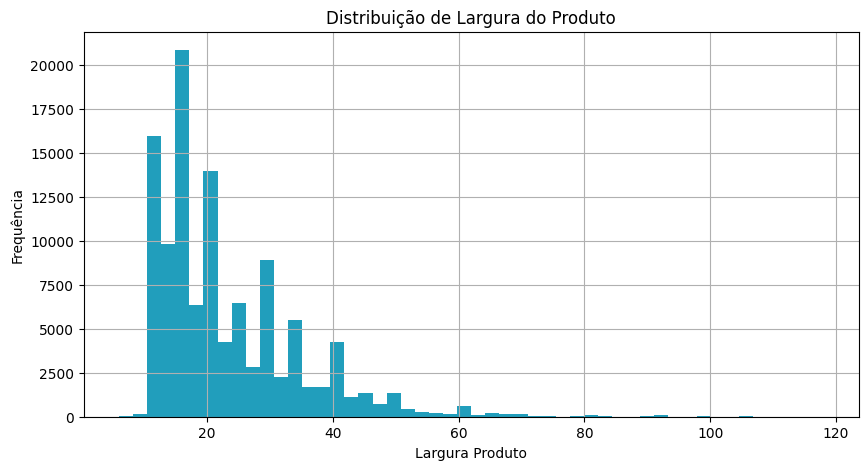

In [69]:
plt.figure(figsize=(10, 5))
df['largura_produto'].hist(bins=50, color='#219ebc')
plt.title('Distribuição de Largura do Produto')
plt.xlabel('Largura Produto')
plt.ylabel('Frequência');

## Discussão sobre escolhas de plots

A escolha do tipo de gráfico para cada variável foi feita considerando a natureza dos dados e o objetivo de obter uma visão inicial clara da distribuição de cada atributo. O gráfico de barras foi utilizado para a variável `prestacoes`, que tem poucos valores únicos, pois esse tipo de plot facilita a visualização da frequência de cada categoria, permitindo identificar rapidamente padrões ou valores mais comuns.
O boxplot foi escolhido para variáveis contínuas com muitos valores únicos, como `valor_pagamento`, `preco`, `valor_frete` e `peso_produto`, já que é eficiente para visualizar a mediana, a dispersão dos dados e possíveis outliers.
Já o histograma foi utilizado para variáveis contínuas relacionadas a dimensões de produtos (`comprimento_produto`, `altura_produto`, `largura_produto`), pois ele permite observar a distribuição dos dados ao longo de intervalos, facilitando a identificação de assimetrias, concentrações e possíveis anomalias.

## Variáveis Categóricas

- Para variáveis com muitas categorias, foram exibidas apenas as 10 mais frequentes em tabelas

In [81]:
for col in categorical_variables:
    print(f"\n{col} (top 10):")
    print(df[col].value_counts().head(10))
    print("Percent:")
    print((df[col].value_counts(normalize=True).head(10) * 100).round(2))
    print("-" * 40)


cidade_cliente (top 10):
cidade_cliente
sao paulo                17772
rio de janeiro            7818
belo horizonte            3118
brasilia                  2186
curitiba                  1732
campinas                  1664
porto alegre              1564
salvador                  1440
guarulhos                 1320
sao bernardo do campo     1071
Name: count, dtype: int64
Percent:
cidade_cliente
sao paulo               15.80
rio de janeiro           6.95
belo horizonte           2.77
brasilia                 1.94
curitiba                 1.54
campinas                 1.48
porto alegre             1.39
salvador                 1.28
guarulhos                1.17
sao bernardo do campo    0.95
Name: proportion, dtype: float64
----------------------------------------

estado_cliente (top 10):
estado_cliente
SP    47523
RJ    14600
MG    13102
RS     6224
PR     5719
SC     4123
BA     3856
GO     2320
ES     2224
DF     2200
Name: count, dtype: int64
Percent:
estado_cliente
SP   42.25
RJ 

In [39]:
df.groupby(['score_avaliacao']).size()

score_avaliacao
1    14283
2     3895
3     9463
4    21434
5    63417
dtype: int64

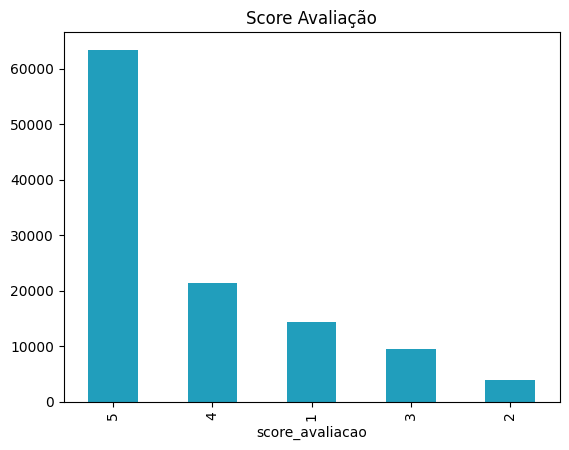

In [41]:
df.score_avaliacao.value_counts().plot(kind='bar', title='Score Avaliação',color = ['#219ebc']);